# TrackSubtractAutomatic removal of copyrighted music from audio streams.

2018.06.07 MPKT

## Goal
Most major video-sharing platforms scan content for copyrighted audio. When infringing audio is detected in the background of a file, it is either deleted or muted. Either option results in fewer files, less revenue, and frustrated users. TrackSubtract provides a one-click product for removing unwanted copyrighted music from any audio file.

## Algorithm
A user submits an audiofile labeled `SongAndSignal` that contains both the desired audio and a undesirable background song.
-  A music identification service (such as the open-source EchoPrint) identifies the song track in the background
-  A file containing labeled `SongTrue` is obtained, containing a clean version.
-  Signal correlation between the `SongAndSignal` and `SongTrue` is calculated as a function of lag time to identify the temporal offset.
-  A sliding correction window (in the time domain) will scan over the song to match the amplitude of `SongTrue` to `SongAndSignal` before subtraction, since this will vary over the course of the recording. Thus the pre-subtraction signal attenuation factor (*A*) is empirically determined as a function of time.
-  In real situations, the attenuation will not be consistent across all frequencies (trivial example: music that was accidentally recorded while being played from a phone speaker will not contain the bass frequencies that are present in `SongTrue`). Consequently, it may be helpful to pass a sliding frequency window within the sliding time window. In this case, the pre-subtraction signal attenuation (*A*) is a calculated as a function of time and frequency.
-  The `SongTrue` is waveform is inverted, scaled by *A*, and added to `SongAndSignal`.

## Quick Eqns
Only taking into account the temporal offset, this can be conceptualized as: `SongAndSignal(t) = Signal(t) + A*Song(t+temporalOffset)`, thus, `Signal(t) = SignalAndSong(t) - A*Song(t+temporalOffset)`

Taking into account (by sliding windows) that the attenuation is a function of both time and frequency: `Signal(t,f) = SignalAndSong(t,f) - *A(t,f)*\*Song(t+temporalOffset,f)`

## Data
The `SongTrue` file contains a recording of the song "Hey" from the BenSound.com royalty-free audio website.

The `SongAndSignal` file contains a recording of me talking, while "Hey" plays in the background.

## Import necessary libraries

In [1]:
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as plt
import numpy as np

## Import the files

In [2]:
# Filenames
Mixed_Filename = 'SongAndSignal.wav';
Song_True_Filename = 'SongTrue_MONO_Short.wav';

# actual import
TrueSongRate, TrueSongTimeseries = wavread(Song_True_Filename)
MixedRate, MixedTimeseries = wavread(Mixed_Filename)

## Observe spectrogram of the mixed audio

MixedTimeseries size = 942336
MixedRate = 44100
Track len = 21.37 s
PXX size = 3894696
freqs size = 513
bins size = 7592


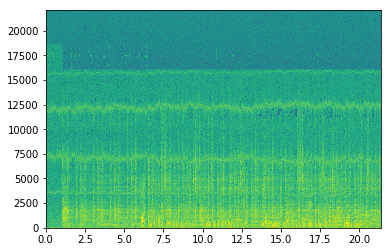

In [3]:
Pxx_Mix, freqs_Mix, bins_Mix, im_Mix = plt.specgram(MixedTimeseries, NFFT=1024, Fs=MixedRate, noverlap=900)
print('MixedTimeseries size = ' + str(MixedTimeseries.size))
print('MixedRate = ' + str(MixedRate))
print('Track len = ' + str(round(MixedTimeseries.size/MixedRate,2))+ ' s')
print('PXX size = ' + str(Pxx_Mix.size))
print('freqs size = ' + str(freqs_Mix.size))
print('bins size = ' + str(bins_Mix.size))


## Observe spectrogram of the song alone (True Song)

TrueSongTimeseries size = 904280
TrueSongRate = 44100
Track len = 20.51 s
PXX size = 3737205
freqs size = 513
bins size = 7285


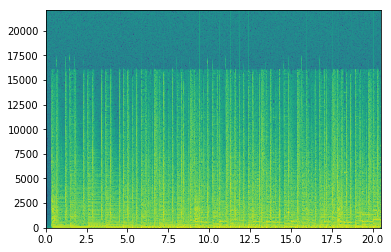

In [4]:
Pxx_TrueSong, freqs_TrueSong, bins_TrueSong, im_TrueSong = plt.specgram(TrueSongTimeseries, NFFT=1024, Fs=TrueSongRate, noverlap=900)
print('TrueSongTimeseries size = ' + str(TrueSongTimeseries.size))
print('TrueSongRate = ' + str(TrueSongRate))
print('Track len = ' + str(round(TrueSongTimeseries.size/TrueSongRate,2))+ ' s')
print('PXX size = ' + str(Pxx_TrueSong.size))
print('freqs size = ' + str(freqs_TrueSong.size))
print('bins size = ' + str(bins_TrueSong.size))